In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import sklearn
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')

### Importing data: 

In [4]:
diamonds = pd.read_csv('diamonds.csv', na_values = ['?'])
display(diamonds)
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


# Initial Data Analysis: 

### Removing 'Unnamed: 0' column and rearranging the columns:

In [5]:
diamonds = diamonds.iloc[: , 1:]
diamonds = diamonds[['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']]
display(diamonds)

,cut,color,clarity,carat,depth,table,x,y,z,price
0,Ideal,E,SI2,0.23,61.5,55.0,3.95,3.98,2.43,326
1,Premium,E,SI1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,Good,E,VS1,0.23,56.9,65.0,4.05,4.07,2.31,327
3,Premium,I,VS2,0.29,62.4,58.0,4.20,4.23,2.63,334
4,Good,J,SI2,0.31,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,Ideal,D,SI1,0.72,60.8,57.0,5.75,5.76,3.50,2757
53936,Good,D,SI1,0.72,63.1,55.0,5.69,5.75,3.61,2757
53937,Very Good,D,SI1,0.70,62.8,60.0,5.66,5.68,3.56,2757
53938,Premium,H,SI2,0.86,61.0,58.0,6.15,6.12,3.74,2757


### Checking for missing values:

In [6]:
diamonds.isnull().sum()

cut        0
color      0
clarity    0
carat      0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Checking datatypes for each column: 

In [7]:
diamonds.dtypes

cut         object
color       object
clarity     object
carat      float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### Calculating the variance for each column:

In [8]:
print(diamonds.var())

carat    2.246867e-01
depth    2.052404e+00
table    4.992948e+00
x        1.258347e+00
y        1.304472e+00
z        4.980109e-01
price    1.591563e+07
dtype: float64


# EDA:

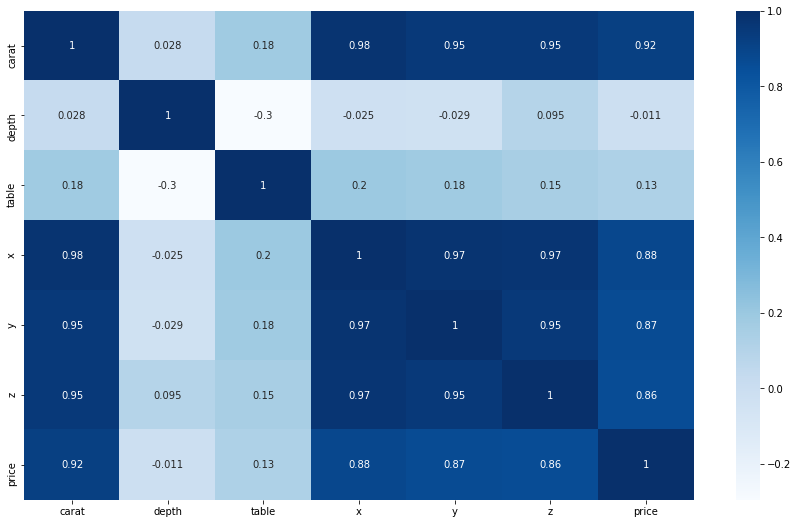

In [9]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(diamonds.corr(), cmap='Blues', annot = True)

### Calculating counts for each of the categorical features: 

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


Text(0, 0.5, 'Counts')

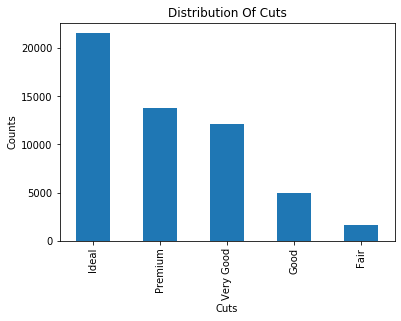

In [10]:
print(diamonds['cut'].value_counts())
diamonds['cut'].value_counts().plot(kind = 'bar')
plt.title("Distribution Of Cuts")
plt.xlabel("Cuts")
plt.ylabel("Counts")


G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


Text(0, 0.5, 'Count')

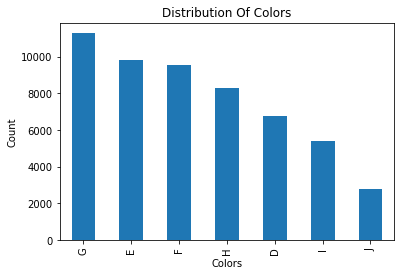

In [11]:
print(diamonds['color'].value_counts())
diamonds['color'].value_counts().plot(kind = 'bar')
plt.title("Distribution Of Colors")
plt.xlabel("Colors")
plt.ylabel("Count")

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


Text(0, 0.5, 'Count')

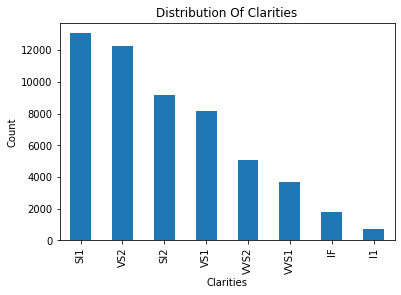

In [12]:
print(diamonds['clarity'].value_counts())
diamonds['clarity'].value_counts().plot(kind = 'bar')
plt.title("Distribution Of Clarities")
plt.xlabel("Clarities")
plt.ylabel("Count")

### Visualising distribution of prices: 

Text(0.5, 1.0, 'Distribution of Prices')

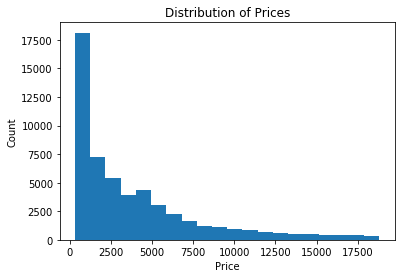

In [13]:
plt.hist(diamonds['price'], bins = 20)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Prices")


Min:  326
Lower quartile:  950.0
Median:  2401.0
Upper quartile:  5324.25
Max:  18823


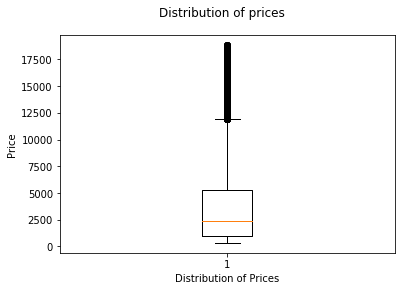

In [14]:
fig = plt.figure()
fig.suptitle("Distribution of prices", fontsize = 12)
ax = fig.add_subplot()

ax.boxplot(diamonds['price'])
ax.set_xlabel("Distribution of Prices")
ax.set_ylabel("Price")
min_price = np.min(diamonds['price'])
lower_quartile = np.percentile(diamonds['price'], 25)
median = np.median(diamonds['price'])
upper_quartile = np.percentile(diamonds['price'], 75)
max_price = np.max(diamonds['price'])

print("Min: ", min_price)
print("Lower quartile: ", lower_quartile)
print("Median: ", median)
print("Upper quartile: ", upper_quartile)
print("Max: ", max_price)


### Seeing how numerical variables change with price. Also checking for outliers. 

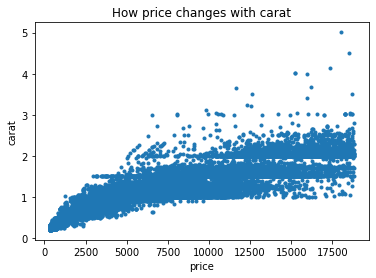

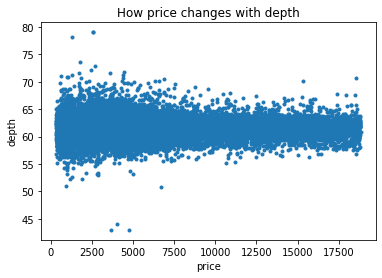

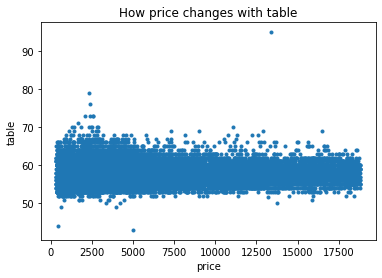

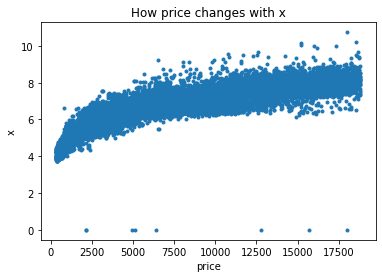

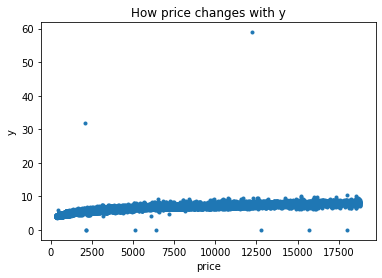

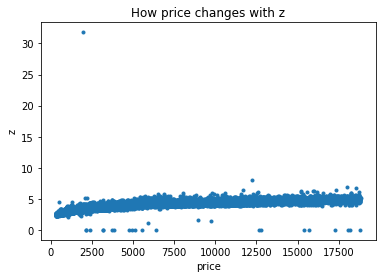

In [15]:
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']

for column in numerical_columns:
    
    plt.plot(diamonds['price'], diamonds[column], '.')
    plt.title('How price changes with '+ column)
    plt.xlabel('price')
    plt.ylabel(column)
    plt.show()


### Removing Outliers
#### With help from: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

In [16]:
from scipy import stats

print("Total rows before:", diamonds.shape)

diamonds_numerical = diamonds[numerical_columns]

diamonds_numerical = diamonds_numerical[(np.abs(stats.zscore(diamonds_numerical)) < 3).all(axis=1)]

diamonds = diamonds.drop(numerical_columns, axis = 1)

diamonds = pd.merge(diamonds, diamonds_numerical, left_index = True, right_index = True)
diamonds = diamonds.reset_index(drop = True)

print("Total rows after:", diamonds.shape)

Total rows before: (53940, 10)
Total rows after: (52552, 10)


### Seeing new scatters which exclude outliers: 

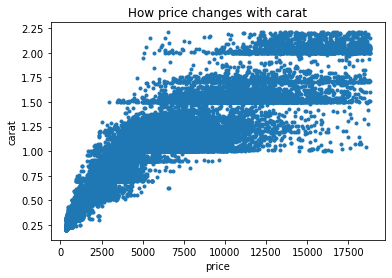

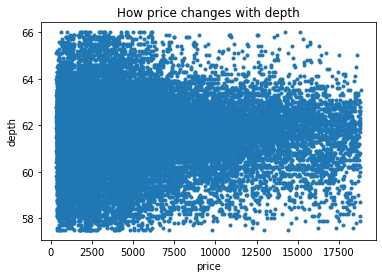

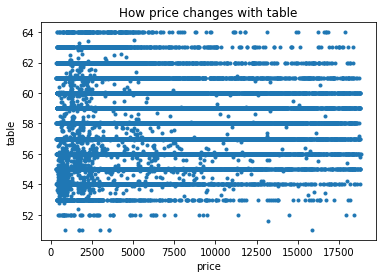

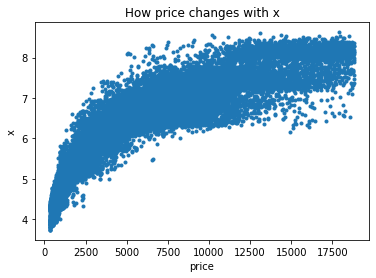

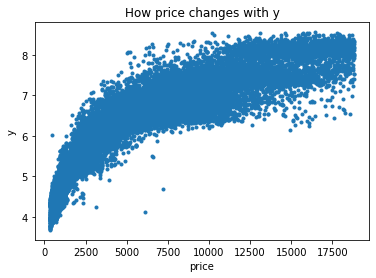

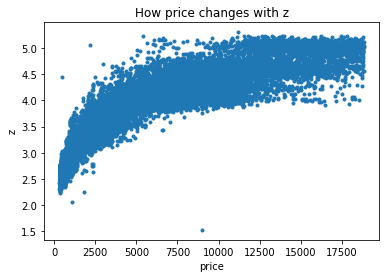

In [17]:
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']

for column in numerical_columns:
    
    plt.plot(diamonds['price'], diamonds[column], '.')
    plt.title('How price changes with '+ column)
    plt.xlabel('price')
    plt.ylabel(column)
    plt.show()

### Comparing X, Y, and Z distributions: 

Min:  3.73
Lower quartile:  4.7
Median:  5.68
Upper quartile:  6.52
Max:  8.63
-------
Min:  3.68
Lower quartile:  4.71
Median:  5.69
Upper quartile:  6.52
Max:  8.56


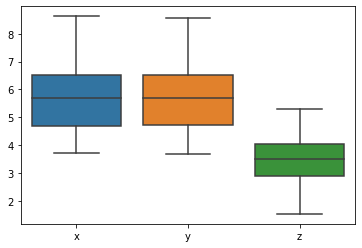

In [18]:
xyz = diamonds[['x','y','z']]

sns.boxplot(data = xyz)


min_x = np.min(diamonds['x'])
lq_x = np.percentile(diamonds['x'], 25)
median_x = np.median(diamonds['x'])
uq_x = np.percentile(diamonds['x'], 75)
max_x = np.max(diamonds['x'])


print("Min: ", min_x)
print("Lower quartile: ", lq_x)
print("Median: ", median_x)
print("Upper quartile: ", uq_x)
print("Max: ", max_x)


min_y = np.min(diamonds['y'])
lq_y = np.percentile(diamonds['y'], 25)
median_y = np.median(diamonds['y'])
uq_y = np.percentile(diamonds['y'], 75)
max_y = np.max(diamonds['y'])
print("-------")
print("Min: ", min_y)
print("Lower quartile: ", lq_y)
print("Median: ", median_y)
print("Upper quartile: ", uq_y)
print("Max: ", max_y)



### Dropping columns not correlated with price:

In [19]:
diamonds.drop(['depth', 'table'], axis = 1, inplace = True)

### Encoding categorical data:

In [20]:

diamonds_cat = diamonds[['cut', 'color', 'clarity']]

#Transform training data: -------------

diamonds_cat = diamonds_cat.merge(pd.get_dummies(diamonds_cat.cut, drop_first = True), left_index = True, right_index = True)
diamonds_cat.drop('cut', axis = 1, inplace = True)

diamonds_cat_cat = diamonds_cat.merge(pd.get_dummies(diamonds_cat.color, drop_first = True), left_index = True, right_index = True)
diamonds_cat.drop('color', axis = 1, inplace = True)

diamonds_cat = diamonds_cat.merge(pd.get_dummies(diamonds_cat.clarity, drop_first = True), left_index = True, right_index = True)
diamonds_cat.drop('clarity', axis = 1, inplace = True)



diamonds.drop(['cut', 'color', 'clarity'], axis = 1, inplace = True)
diamonds = pd.merge(diamonds_cat, diamonds, left_index = True, right_index = True)

display(diamonds)


"""

NOTE: We use 'drop_first' to avoid dummy variable trap. 
We get the same information without first dummy variable column. 

"""

,Good,Ideal,Premium,Very Good,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,price,carat,x,y,z
0,0,1,0,0,0,0,1,0,0,0,0,326,0.23,3.95,3.98,2.43
1,0,0,1,0,0,1,0,0,0,0,0,326,0.21,3.89,3.84,2.31
2,0,0,1,0,0,0,0,0,1,0,0,334,0.29,4.20,4.23,2.63
3,1,0,0,0,0,0,1,0,0,0,0,335,0.31,4.34,4.35,2.75
4,0,0,0,1,0,0,0,0,0,0,1,336,0.24,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52547,0,1,0,0,0,1,0,0,0,0,0,2757,0.72,5.75,5.76,3.50
52548,1,0,0,0,0,1,0,0,0,0,0,2757,0.72,5.69,5.75,3.61
52549,0,0,0,1,0,1,0,0,0,0,0,2757,0.70,5.66,5.68,3.56
52550,0,0,1,0,0,0,1,0,0,0,0,2757,0.86,6.15,6.12,3.74


"\n\nNOTE: We use 'drop_first' to avoid dummy variable trap. \nWe get the same information without first dummy variable column. \n\n"

### Train test split the data:

In [21]:
X = diamonds.drop(['price'], axis = 1)
y = diamonds['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=309)

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)


### Combining variables X and Y using PCA: 

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
pca.fit(X_train[['x','y']])

pca_train = pd.DataFrame(pca.transform(X_train[['x','y']]))
pca_test = pd.DataFrame(pca.transform(X_test[['x','y']]))


X_train.drop(['x','y'], axis = 1, inplace = True)
X_train['xy'] = pca_train

X_test.drop(['x','y'], axis = 1, inplace = True)
X_test['xy'] = pca_test

### Scaling Numeric data:

In [23]:
from sklearn.preprocessing import StandardScaler

X_train_numeric = X_train[['carat','xy', 'z']]
X_test_numeric = X_test[['carat','xy', 'z']]

X_col_names = list(X_train_numeric.columns)

scaler=StandardScaler()


#Transform training data: -------------------

X_train_numeric = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns = X_col_names)

display(X_train_numeric)

# Transform testing data: ---------------------

X_test_numeric = pd.DataFrame(scaler.transform(X_test_numeric), columns = X_col_names)

display(X_test_numeric)

,carat,xy,z
0,0.885152,1.060894,0.947453
1,-0.404376,-0.310737,-0.194397
2,0.929619,1.010391,1.080915
3,-0.826807,-0.879514,-0.787565
4,0.929619,1.024227,1.051257
...,...,...,...
36781,-0.782341,-0.801488,-0.757907
36782,0.507187,0.785606,0.487747
36783,0.484954,0.583831,0.576722
36784,-0.560009,-0.416138,-0.490981


,carat,xy,z
0,-0.137577,0.001278,0.117017
1,-0.515542,-0.365516,-0.416835
2,-0.626708,-0.636380,-0.505810
3,0.773986,0.868175,0.888136
4,2.752744,2.230543,2.400715
...,...,...,...
15761,-1.026907,-1.246367,-1.113808
15762,0.262621,0.313174,0.487747
15763,-0.248743,-0.076748,-0.105421
15764,-0.937974,-1.021641,-1.098979


### Scaling the target variables:

In [24]:
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

### merge categorical and numerical data:

In [25]:
X_train = pd.merge(X_train.iloc[:, 0 : 11], X_train_numeric, left_index = True, right_index = True)
X_test = pd.merge(X_test.iloc[:, 0 : 11], X_test_numeric, left_index = True, right_index = True)

display(X_train)

,Good,Ideal,Premium,Very Good,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,carat,xy,z
0,0,1,0,0,0,0,0,0,0,0,1,0.885152,1.060894,0.947453
1,0,0,0,1,0,1,0,0,0,0,0,-0.404376,-0.310737,-0.194397
2,0,1,0,0,0,0,1,0,0,0,0,0.929619,1.010391,1.080915
3,0,0,0,1,0,1,0,0,0,0,0,-0.826807,-0.879514,-0.787565
4,0,1,0,0,0,0,0,1,0,0,0,0.929619,1.024227,1.051257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36781,0,0,1,0,0,0,0,0,1,0,0,-0.782341,-0.801488,-0.757907
36782,1,0,0,0,0,0,1,0,0,0,0,0.507187,0.785606,0.487747
36783,0,0,0,1,0,0,1,0,0,0,0,0.484954,0.583831,0.576722
36784,0,1,0,0,0,0,0,0,0,1,0,-0.560009,-0.416138,-0.490981


### Import models and performance metrics:

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import time
import math

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor

In [28]:
pm = pd.DataFrame(columns = ['Algorithm','MSE', 'RMSE', 'RSE', 'MAE', 'Time (Seconds)'])

In [29]:
"""
    Fits and makes predictions using the input model.
    returns a dataframe row which includes performance metrics for r2, MSE, RMSE, RSE, and MAE. 
"""
def calculate_pms(reg, reg_name):
    print("Calculating PMs for", reg_name)
    start = time.time()
    reg.fit(X_train, y_train)

    y_test_pred = reg.predict(X_test)
    end = time.time()
    
    #R Squared (R2)
    
    r2 = r2_score(y_test, y_test_pred)
    r2 = round(r2, 2)

    #Mean squared error (MSE)
    mse = mean_squared_error(y_test,y_test_pred)
    mse = round(mse, 2)

    #Root mean squared error (RMSE)
    rmse = mean_squared_error(y_test,y_test_pred, squared = False)
    rmse = round(rmse, 2)

    #Relative squared error (RSE)
    rse = (1 - r2_score(y_test,y_test_pred))
    rse = round(rse, 2)

    #Mean absolute error (MAE)
    mae=mean_absolute_error(y_test,y_test_pred)
    mae = round(mae, 2)

    #Execution time
    extime = end - start
    extime = round(extime, 2)

    row = {'Algorithm': reg_name, 'R2': r2, 'MSE' : mse, 'RMSE' : rmse, 'RSE' : rse, 'MAE' : mae, 'Time (Seconds)' : extime}
    
    return row

### Initialise the algorithms and calculate performance metrics: 

In [30]:
#Parameters for the below regressors have been found using randomized grid searches. Please see the Hyperparameter
#Optimisation section. 

all_regs = [LinearRegression(), 
            KNeighborsRegressor(p = 2, n_neighbors = 9, leaf_size = 32), 
            Ridge(), 
            DecisionTreeRegressor(splitter = 'best', min_weight_fraction_leaf = 0.1, min_samples_leaf = 6, max_leaf_nodes = 80, max_features = None, max_depth = 9), 
            RandomForestRegressor(n_estimators =100, min_samples_split = 15, min_samples_leaf = 1, max_depth = 15),
           GradientBoostingRegressor(n_estimators =  500, max_depth = 9, learning_rate = 0.01),
            SGDRegressor(), SVR(), LinearSVR(), 
            MLPRegressor(solver = 'adam', learning_rate = 'constant', hidden_layer_sizes = (50, 50, 50), alpha = 0.05, activation = 'relu')]

all_reg_names = ['LinearRegression', 'KNeighborsRegressor', 'Ridge', 'DecisionTreeRegressor', 'RandomForestRegressor',
                'GradientBoostingRegressor', 'SGDRegressor', 'SVR', 'LinearSVR', 'MLPRegressor']

for i in range(len(all_regs)):
    pm = pm.append(calculate_pms(all_regs[i], all_reg_names[i]), ignore_index = True)
pm = pm[['Algorithm', 'R2', 'MSE', 'RMSE', 'RSE', 'MAE', 'Time (Seconds)']]
display(pm)

Calculating PMs for LinearRegression
Calculating PMs for KNeighborsRegressor
Calculating PMs for Ridge
Calculating PMs for DecisionTreeRegressor
Calculating PMs for RandomForestRegressor
Calculating PMs for GradientBoostingRegressor
Calculating PMs for SGDRegressor
Calculating PMs for SVR
Calculating PMs for LinearSVR
Calculating PMs for MLPRegressor


,Algorithm,R2,MSE,RMSE,RSE,MAE,Time (Seconds)
0,LinearRegression,0.91,0.09,0.30,0.09,0.19,0.01
1,KNeighborsRegressor,0.94,0.06,0.25,0.06,0.13,1.22
2,Ridge,0.91,0.09,0.30,0.09,0.19,0.01
3,DecisionTreeRegressor,0.84,0.16,0.40,0.16,0.23,0.04
4,RandomForestRegressor,0.94,0.06,0.25,0.06,0.13,9.06
5,GradientBoostingRegressor,0.94,0.06,0.25,0.06,0.13,48.55
6,SGDRegressor,0.90,0.10,0.32,0.10,0.20,0.05
7,SVR,0.94,0.06,0.25,0.06,0.14,62.87
8,LinearSVR,0.89,0.10,0.32,0.11,0.18,1.24
9,MLPRegressor,0.94,0.06,0.24,0.06,0.13,16.44


### Calculating ranks for each of the models:

In [34]:
pm_ranked = pm.rank(method = 'min', numeric_only = True).astype(int)
pm_ranked['Algorithm'] = pm['Algorithm']
pm_ranked = pm_ranked[['Algorithm', 'MSE', 'RMSE', 'RSE', 'MAE', 'Time (Seconds)']]
pm_ranked['Sum Of Ranks'] = pm_ranked[list(pm_ranked.columns)].sum(axis=1)
pm_ranked['Overall Rank'] = pm_ranked['Sum Of Ranks'].rank(method = 'min').astype(int)
pm_ranked.sort_values(['Overall Rank'], inplace = True)
display(pm_ranked)

,Algorithm,MSE,RMSE,RSE,MAE,Time (Seconds),Sum Of Ranks,Overall Rank
1,KNeighborsRegressor,1,2,1,1,5,10,1
4,RandomForestRegressor,1,2,1,1,7,12,2
9,MLPRegressor,1,1,1,1,8,12,2
5,GradientBoostingRegressor,1,2,1,1,9,14,4
7,SVR,1,2,1,5,10,19,5
0,LinearRegression,6,6,6,7,1,26,6
2,Ridge,6,6,6,7,1,26,6
6,SGDRegressor,8,8,8,9,4,37,8
8,LinearSVR,8,8,9,6,6,37,8
3,DecisionTreeRegressor,10,10,10,10,3,43,10


### Hyperparameter optimisation:

In [ ]:
"""from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

reg = MLPRegressor()

print("Score before:", reg.fit(X_train, y_train).score(X_test, y_test))

parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


gridF = RandomizedSearchCV(reg, parameters, n_iter = 100, cv = 3, verbose = 10, random_state = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print("Score after:", bestF.score(X_test, y_test))
print('Best parameters:', bestF.best_params_)"""

In [ ]:
"""from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV


reg = DecisionTreeRegressor(random_state = 1)

print("Score before:", reg.fit(X_train, y_train).score(X_test, y_test))

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

gridF = RandomizedSearchCV(reg, parameters, n_iter = 100, cv = 3, verbose = 10, random_state = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print(bestF.score(X_test, y_test))
print(bestF.best_params_)"""

In [ ]:
"""from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

reg = GradientBoostingRegressor(random_state = 1)

print("Score before:", reg.fit(X_train, y_train).score(X_test, y_test))

parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

gridF = RandomizedSearchCV(reg, parameters, n_iter = 100, cv = 3, verbose = 10, random_state = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print(bestF.score(X_test, y_test))
print(bestF.best_params_)"""

In [ ]:
"""from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

reg = RandomForestRegressor(random_state = 1)

print("Score before:", reg.fit(X_train, y_train).score(X_test, y_test))

parameters = {'n_estimators' : [100, 300, 500, 800, 1200],
              'max_depth' : [5, 8, 10, 15, 25, 30],
              'min_samples_split' : [2,5,10,15, 100],
              'min_samples_leaf' : [1,2,5,10]
              }

gridF = RandomizedSearchCV(reg, parameters, n_iter = 100, cv = 3, verbose = 10, random_state = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print("Score after:", bestF.score(X_test, y_test))
print(bestF.best_params_)"""

In [ ]:
"""from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

reg = KNeighborsRegressor()

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p = [1,2]

parameters = {'leaf_size' : leaf_size, 'n_neighbors' : n_neighbors, 'p' : p}


print("Score before:", reg.fit(X_train, y_train).score(X_test, y_test))


gridF = RandomizedSearchCV(reg, parameters, n_iter = 100, cv = 3, verbose = 10, random_state = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print(bestF.score(X_test, y_test))
print(bestF.best_params_)"""